In [ ]:
!pip install fastf1

In [ ]:
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# enabling misc_mpl_mods will turn on minor grid lines that clutters the plot
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

In [ ]:
# Load the race session
race = fastf1.get_session(2023, "Azerbaijan", 'R')
race.load()

In [ ]:
# Get all the laps for the point finishers only and filter out slow laps
point_finishers = race.drivers[:10]
driver_laps = race.laps.pick_drivers(point_finishers).pick_quicklaps().reset_index()

In [ ]:
# Get abbreviations in the finishing order.
finishing_order = [race.get_driver(i)["Abbreviation"] for i in point_finishers]

In [ ]:
# We need to modify the palette. Its keys are the driver's full names but we need the keys to be the drivers'abbreviations.
driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

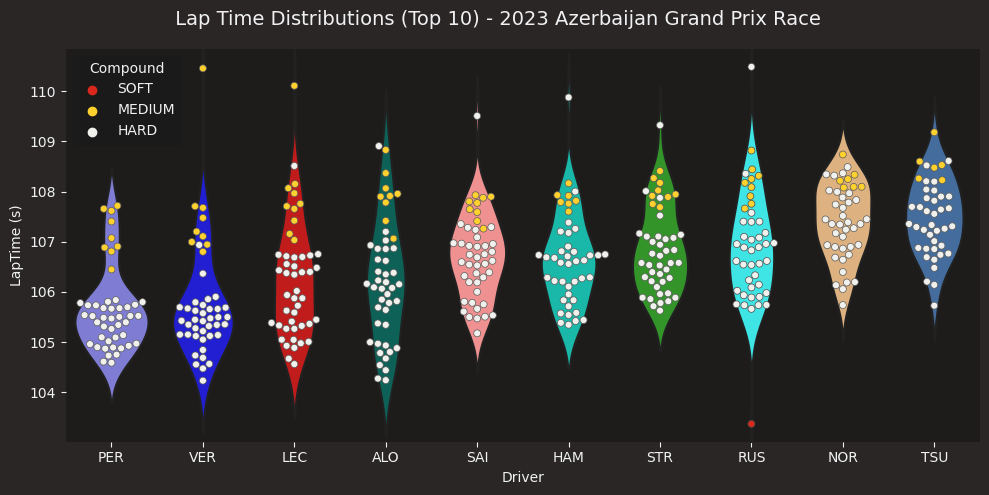

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.suptitle(f' Lap Time Distributions (Top 10) - {race.event.year} {race.event.EventName} {race.name}', size=14)

# Seaborn doesn't have proper timedelta support so we have to convert timedelta to float (in seconds)
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

# Violin plots to show the distributions
sns.violinplot(data=driver_laps, x="Driver", y="LapTime(s)", inner=None, scale="area", order=finishing_order, palette=driver_colors)

# Swarm plot to show the actual laptimes
sns.swarmplot(data=driver_laps, x="Driver", y="LapTime(s)", order=finishing_order, hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS, hue_order=["SOFT", "MEDIUM", "HARD"], linewidth=0.5, size=5)

ax.set_ylabel("LapTime (s)")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()